### Setup the Spark VM and complete the below assignment

Objective:- Build a ML model to predict the employee compensation.
The application should be modelled using Spark.

You can refer to the below links for spark commands:-
- https://spark.apache.org/docs/latest/ml-pipeline.html

- https://github.com/spark-in-action/first-edition

- https://github.com/FavioVazquez/first_spark_model

# Predicting Employee Compensation

## Data Dictionary
<br>**Year Type** - Fiscal (July through June) or Calendar (January through December)
<br>**Year** - An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.
<br>**Organization Group Code** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,Fire, Adult Probation, District Attorney, and Sheriff.
<br> **Organization Group** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,
Fire, Adult Probation, District Attorney, and Sheriff.
<br>**Department Code** - Departments are the primary organizational unit used by the Cityand County of San Francisco. Examples include Recreation and
Parks, Public Works, and the Police Department.
<br>**Department Code** - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.
<br>**Union Code** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Union** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Job Family Code** Job Family combines similar Jobs into meaningful groups.
<br>**Job Family** Job Family combines similar Jobs into meaningful groups.
<br>**Employee Identifier** Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset. The column does not appear on the
Employee Compensation report hosted on openbook.sfgov.org,
but that report does show one row for each employee. Employee
ID has been included here to allow users to reconstruct the
original report. Note that each employee’s identifier will change
each time this dataset is updated, so comparisons by employee
across multiple versions of the dataset are not possible.
<br>**Salaries** - Normal salaries paid to permanent or temporary City employees.
<br>**Overtime** - Amounts paid to City employees working in excess of 40 hours
per week.
<br>**Other Salaries** - Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. Total Salary Number The sum of all salaries paid to City employees.
<br>**Retirement** City contributions to employee retirement plans.
<br>**Health/Dental** City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits.
<br>**Other Benefits** Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment
insurance premiums, and minor discretionary benefits not included in the above categories.
<br>**Total Benefits** The sum of all benefits paid to City employees.
<br>**Total Compensation** The sum of all salaries and benefits paid to City employees.

Read the data and answer the following questions to predict employee compensation

In [ ]:
!pip install pyspark==3.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 17.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764012 sha256=7cfb2364f569ae2ed16db1d09996fb7f3aadb15d12b1b93faf8de5645e3d29af
  Stored in directory: /root/.cache/pip/wheels/81/9c/6c/d5200fcf351ffa39cbe09911e99703283624cd037df58070d9
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
!pip install -q findspark

In [ ]:
import findspark
findspark.init()

In [ ]:
findspark.find()

'/usr/local/lib/python3.10/dist-packages/pyspark'

In [ ]:
from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F


spark = SparkSession \
       .builder \
       .appName("Part-2: ML system using pySpark") \
       .getOrCreate()

spark

## 1. Read the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
emp_df = spark.read.csv('/content/drive/My Drive/data/Employee_Compensation.csv', header=True, inferSchema=True)

In [25]:
emp_df.show(5)

+---------+----+-----------------------+---------------+----------+---------------+--------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Department Code|Union Code|Job Family Code|Job Code|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+---------------+----------+---------------+--------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|   Fiscal|2016|                      1|            DAT|       311|           8100|    8177|              49919|114473.16|     0.0|        1500.0|   115973.16|  21025.98|      13068.8|       9368.71|      43463.49|         159436.65|
| Calendar|2013|                      5|            ART|       7

### 1.1 Display the number of rows and columns in the dataset

In [ ]:
print("Number of rows: ",emp_df.count())   # no. of rows

Number of rows:  291825


In [ ]:
print("Number of columns: ",len(emp_df.columns))  # no. of columns

Number of columns:  22


### 1.2 Check the datatype of the variables

In [ ]:
# Datatypes of the variables in emp_df
emp_df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



### 2. Convert the incorrect column type into its suitable column type. And drop the redundant features

In [ ]:
# dropping the redundant colums
redundant_cols = ("Organization Group","Department","Union","Job Family","Job")
emp_df = emp_df.drop(*redundant_cols)
print(len(emp_df.columns))
emp_df.printSchema()

17
root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



### 3. Check basic statistics and perform necessary data preprocessing (Like removing negative amount)

In [ ]:
emp_df.describe().show()

+-------+---------+------------------+-----------------------+---------------+-----------------+------------------+------------------+-------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|Year Type|              Year|Organization Group Code|Department Code|       Union Code|   Job Family Code|          Job Code|Employee Identifier|         Salaries|          Overtime|   Other Salaries|      Total Salary|        Retirement|    Health/Dental|    Other Benefits|    Total Benefits|Total Compensation|
+-------+---------+------------------+-----------------------+---------------+-----------------+------------------+------------------+-------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|  count|   291825|            

In [ ]:
sal_col = ['Salaries', 'Overtime','Other Salaries','Total Salary','Retirement', 'Health/Dental', 'Other Benefits', 'Total Benefits','Total Compensation']
tot = 0
for col in sal_col:
  print("No. of rows having negative values in {}: ".format(col),emp_df.filter(emp_df[col]<0).count())
  tot = tot + emp_df.filter(emp_df[col]<0).count()
print(tot)

No. of rows having negative values in Salaries:  79
No. of rows having negative values in Overtime:  30
No. of rows having negative values in Other Salaries:  62
No. of rows having negative values in Total Salary:  51
No. of rows having negative values in Retirement:  422
No. of rows having negative values in Health/Dental:  344
No. of rows having negative values in Other Benefits:  679
No. of rows having negative values in Total Benefits:  449
No. of rows having negative values in Total Compensation:  246
2362


In [ ]:
for col in sal_col:
  print("No of rows having negative values in column {} = ".format(col),emp_df.filter(emp_df[col] == 0).count())

No of rows having negative values in column Salaries =  3699
No of rows having negative values in column Overtime =  167869
No of rows having negative values in column Other Salaries =  93224
No of rows having negative values in column Total Salary =  374
No of rows having negative values in column Retirement =  45872
No of rows having negative values in column Health/Dental =  14300
No of rows having negative values in column Other Benefits =  932
No of rows having negative values in column Total Benefits =  434
No of rows having negative values in column Total Compensation =  2


In [ ]:
sal_col = ['Salaries','Overtime','Other Salaries','Total Salary','Retirement',\
 'Health/Dental','Other Benefits','Total Benefits','Total Compensation']
for col in sal_col:
  print("No of rows having negative values in column {} = ".format(col),emp_df.filter(emp_df[col] < 0).count())
  emp_df = emp_df.filter(emp_df[col] >= 0)

No of rows having negative values in column Salaries =  79
No of rows having negative values in column Overtime =  29
No of rows having negative values in column Other Salaries =  57
No of rows having negative values in column Total Salary =  0
No of rows having negative values in column Retirement =  376
No of rows having negative values in column Health/Dental =  297
No of rows having negative values in column Other Benefits =  596
No of rows having negative values in column Total Benefits =  0
No of rows having negative values in column Total Compensation =  0


In [ ]:
emp_df.count()

290391

### 4. Perform Missing Value Analysis

In [ ]:
from pyspark.sql.functions import isnull, when, count, col

emp_df.select([count(when(isnull(c), c)).alias(c) for c in emp_df.columns]).show()

print(emp_df.filter(emp_df["Job Family Code"].isNull()).count())

+---------+----+-----------------------+---------------+----------+---------------+--------+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Department Code|Union Code|Job Family Code|Job Code|Employee Identifier|Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+---------------+----------+---------------+--------+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|        0|   0|                      0|              0|        43|             45|       0|                  0|       0|       0|             0|           0|         0|            0|             0|             0|                 0|
+---------+----+-----------------------+---------------+----------+-

In [ ]:
emp_df1 = emp_df.dropna(how='any')
print(emp_df1.count())

290346


### 5. Exploratory Data Analysis

#### 5.1. Find top compensating organizations. Display using bar plot

In [ ]:
emp_df1.columns

['Year Type',
 'Year',
 'Organization Group Code',
 'Department Code',
 'Union Code',
 'Job Family Code',
 'Job Code',
 'Employee Identifier',
 'Salaries',
 'Overtime',
 'Other Salaries',
 'Total Salary',
 'Retirement',
 'Health/Dental',
 'Other Benefits',
 'Total Benefits',
 'Total Compensation']

[Text(0.5, 0, 'Org. group code'), Text(0, 0.5, 'Total Compensation')]

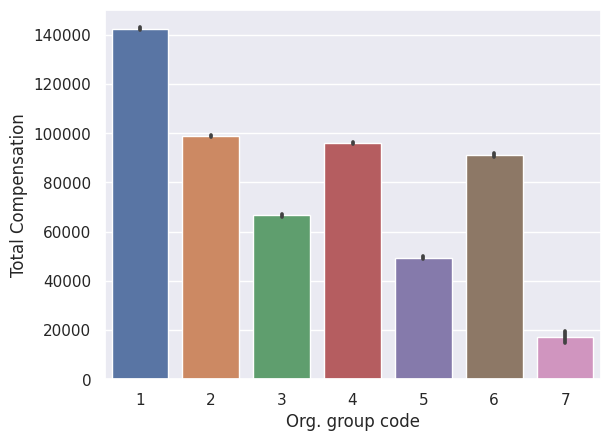

In [ ]:
import seaborn as sns

org_groups = [data[0] for data in emp_df1.select("Organization Group Code").collect()]
Total_Compensation = [data[0] for data in emp_df1.select("Total Compensation").collect()]
sns.set_theme(style="darkgrid")

ax = sns.barplot(x=org_groups, y=Total_Compensation)
ax.set(xlabel='Org. group code', ylabel='Total Compensation')

#### 5.2. Find top Compensating Jobs. Display using bar plot

In [26]:
# Importing necessary libraries
from pyspark.sql import DataFrame, SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [27]:
df1 = emp_df1.groupBy("Job Code") \
    .agg(max("Total Compensation").alias("total_comp")) \
    .orderBy(col("total_comp").desc())
df1.show()

+--------+----------+
|Job Code|total_comp|
+--------+----------+
|    1119| 653498.15|
|    0402| 510574.44|
|    2598|  497505.0|
|    0390| 466798.21|
|    0965| 433302.72|
|    0140| 426006.85|
|    H040| 425605.01|
|    1164| 422799.94|
|    9989| 422019.78|
|    2232| 418013.58|
|    9186| 410459.56|
|    H050| 406063.04|
|    1117| 403743.76|
|    8304| 402204.51|
|    1166| 395626.45|
|    2233| 390385.45|
|    1190| 382624.61|
|    H020| 376938.29|
|    0150| 376513.82|
|    0490| 373599.91|
+--------+----------+
only showing top 20 rows



In [28]:
top_jobs = [data[0] for data in df1.select("Job Code").collect()]
top_jobs = top_jobs[:5]
top_salaries = [data[0] for data in df1.select("total_comp").collect()]
top_salaries=top_salaries[:5]

[Text(0.5, 0, 'Job codes'), Text(0, 0.5, 'Total Compensation')]

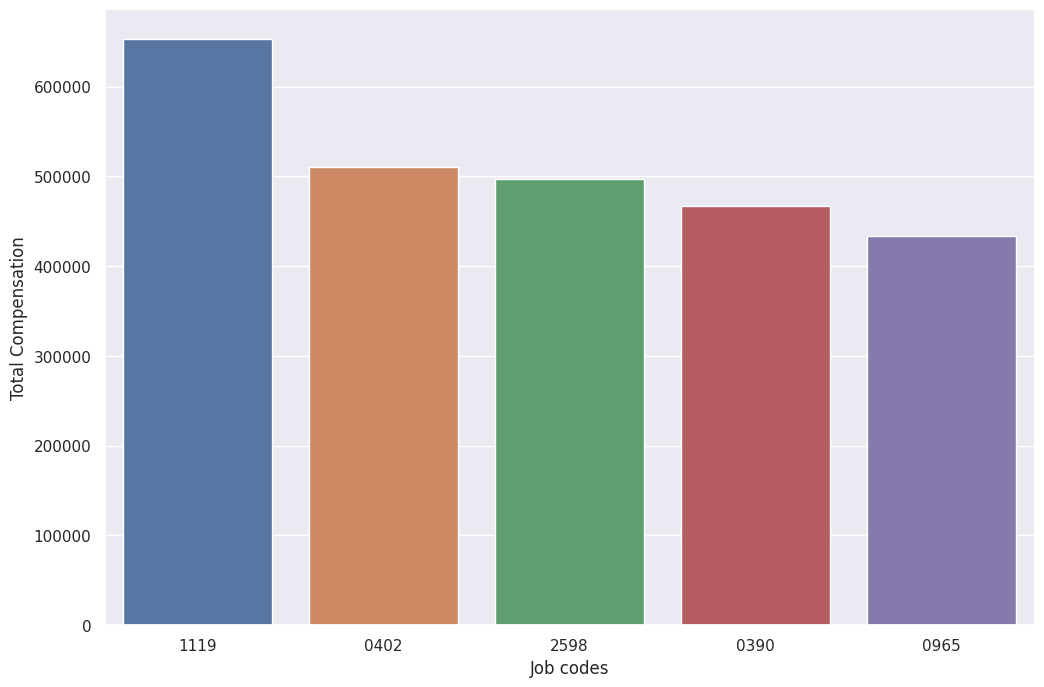

In [29]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.set_theme(style="darkgrid")
ax = sns.barplot(x=top_jobs, y=top_salaries)
ax.set(xlabel='Job codes', ylabel='Total Compensation')

#### 5.3. Check Correlation of Target Variable with Other Independent Variables. Plot Heatmap

In [30]:
numericalColumns = [item[0] for item in emp_df1.dtypes if not item[1].startswith('string')]
#print(numericalColumns)

from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import *

assembler = VectorAssembler(inputCols=numericalColumns, outputCol="features",handleInvalid='keep')
assembled_df = assembler.transform(emp_df1).select("features")

# correlation will be in Dense Matrix
correlation = Correlation.corr(assembled_df,"features","pearson").collect()[0][0]

# To convert Dense Matrix into DataFrame
rows = correlation.toArray().tolist()
print(type(rows))
#print(rows)
print(len(rows))

<class 'list'>
13


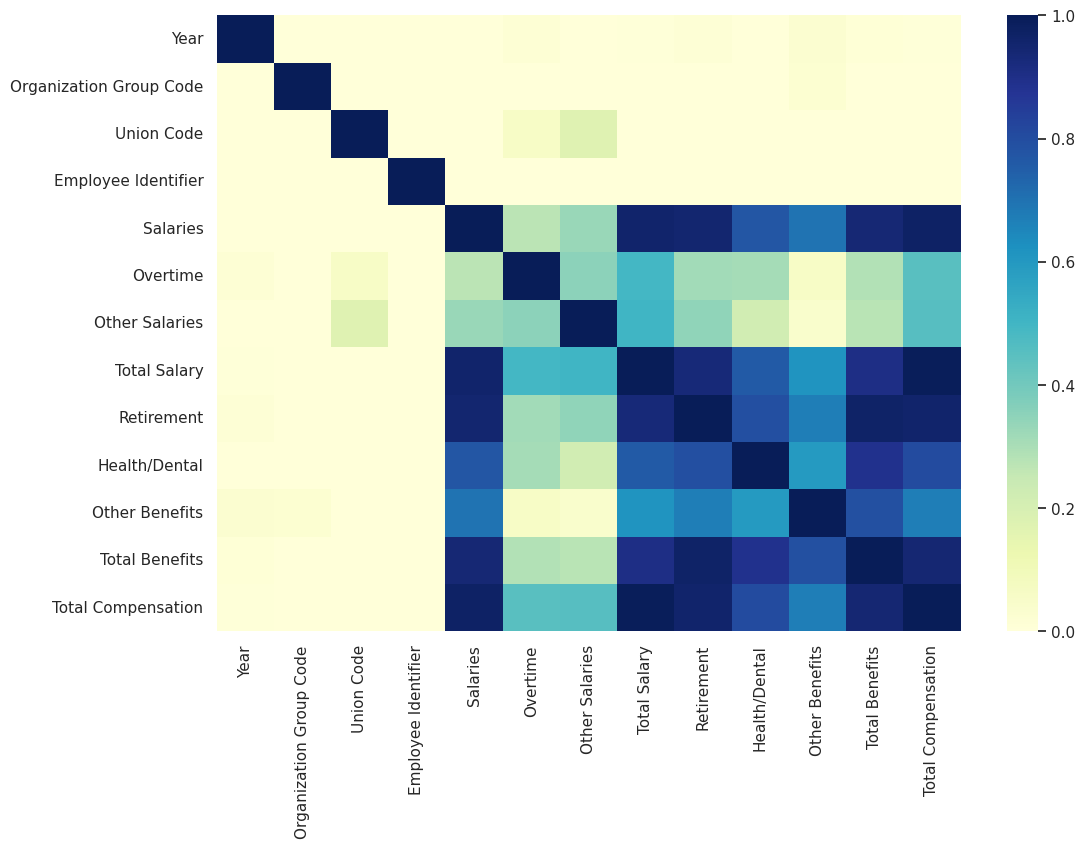

In [31]:
ax = sns.heatmap(rows, vmin=0, vmax=1, xticklabels = numericalColumns, yticklabels = numericalColumns,cmap="YlGnBu")

### 6. Perform necessary data pre-processing and divide the data into train and test set

### 6.1 Categorise the attributes into its type (Use one hot encoding wherever required)

In [32]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

categorical_col = [item[0] for item in emp_df1.dtypes if item[1].startswith('string')]
op_col = [i+"_indexed" for i in categorical_col]

indexer = StringIndexer(inputCols = categorical_col, outputCols = op_col, handleInvalid='keep')
model = indexer.fit(emp_df1)
indexed_df = model.transform(emp_df1)

out_col = [i+"Vec" for i in categorical_col]
encoder = OneHotEncoder(inputCols= op_col, outputCols=out_col)
encodedDF = encoder.fit(indexed_df).transform(indexed_df)
encodedDF.select('Year Type_indexed','Year TypeVec','Department Code_indexed','Department CodeVec',
                 'Job Family Code_indexed', 'Job Family CodeVec', 'Job Code_indexed', 'Job CodeVec').show(5, False)

+-----------------+-------------+-----------------------+------------------+-----------------------+------------------+----------------+------------------+
|Year Type_indexed|Year TypeVec |Department Code_indexed|Department CodeVec|Job Family Code_indexed|Job Family CodeVec|Job Code_indexed|Job CodeVec       |
+-----------------+-------------+-----------------------+------------------+-----------------------+------------------+----------------+------------------+
|0.0              |(2,[0],[1.0])|19.0                   |(54,[19],[1.0])   |16.0                   |(56,[16],[1.0])   |14.0            |(1129,[14],[1.0]) |
|1.0              |(2,[1],[1.0])|43.0                   |(54,[43],[1.0])   |14.0                   |(56,[14],[1.0])   |135.0           |(1129,[135],[1.0])|
|1.0              |(2,[1],[1.0])|0.0                    |(54,[0],[1.0])    |5.0                    |(56,[5],[1.0])    |20.0            |(1129,[20],[1.0]) |
|0.0              |(2,[0],[1.0])|0.0                    |(54,[0]

In [33]:
from pyspark.ml.feature import VectorAssembler

featurecol = ['Year', 'Organization Group Code', 'Union Code', 'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
 'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits', 'Total Benefits', 'Year TypeVec', 'Department CodeVec',
 'Job Family CodeVec', 'Job CodeVec']

# Create the VectorAssembler object
assembler = VectorAssembler(inputCols= featurecol, outputCol= "features")
assembledDF = assembler.transform(encodedDF)

In [34]:
from pyspark.sql import functions as F
from pyspark.ml.linalg import Vectors, VectorUDT

# Define a udf that converts sparse vector into dense vector
# You cannot create your own custom function and run that against the data directly.
# In Spark, You have to register the function first using udf function
sparseToDense = F.udf(lambda v : Vectors.dense(v), VectorUDT())

# We then call the function here passing the column name on which the function has to be applied
densefeatureDF = assembledDF.withColumn('features_array', sparseToDense('features'))

densefeatureDF.select("features", "features_array").show(5, False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [35]:
# Import StandardScaler from pyspark.ml.feature package
from pyspark.ml.feature import StandardScaler

# Create the StandardScaler object. It only take feature column (dense vector)
stdscaler = StandardScaler(inputCol= "features_array", outputCol= "scaledfeatures")

# Fit the StandardScaler object on the output of the dense vector data and transform
stdscaledDF = stdscaler.fit(densefeatureDF).transform(densefeatureDF)
stdscaledDF.select("scaledfeatures" ).show(5, False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 6.2 Split the data into train and test set

In [36]:
# We spilt the data into 70-30 set
# Training Set - 70% obesevations
# Testing Set - 30% observations
trainDF, testDF =  assembledDF.randomSplit([0.7,0.3], seed = 2020)

# print the count of observations in each set
print("Observations in training set = ", trainDF.count())
print("Observations in testing set = ", testDF.count())

Observations in training set =  203282
Observations in testing set =  87064


### 7. Fit Linear Regression model on the data and check its performance

In [37]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='Total Compensation', maxIter=10,
                      regParam=0.8, elasticNetParam=0.1)
lr_model = lr.fit(trainDF)

trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

lr_predictions = lr_model.transform(testDF)
lr_predictions.select("prediction","Total Compensation","features").show(5)

RMSE: 3405.507073
r2: 0.997467
+------------------+------------------+--------------------+
|        prediction|Total Compensation|            features|
+------------------+------------------+--------------------+
|145712.66219760952|         145278.19|(1253,[0,1,2,3,4,...|
|187246.25818757433|         198466.97|(1253,[0,1,2,3,4,...|
|188662.38720637487|         204307.53|(1253,[0,1,2,3,4,...|
|166373.01289226004|         167077.82|(1253,[0,1,2,3,4,...|
|166705.98976597504|         167252.22|(1253,[0,1,2,3,4,...|
+------------------+------------------+--------------------+
only showing top 5 rows



In [38]:
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Total Compensation",metricName="r2")
print("R Squared (R2) on val data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on val data = 0.997433


### 8. Fit Decision Tree Regression model on the data and check its performance (Optional)

In [40]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='scaled_features', labelCol = 'Total Compensation')
# dt_model = dt.fit(trainDF)

### Model Persistence (Optional)
Model persistence means saving your model to a disk. After you finalize your model for prediction depending upon the performance, you need to save the model to the disk. Let's say, you finalize 'lrmodel' to be used for in production environment i.e. in your application. We use the following code to save it.

##### Saving the model

In [43]:
# use save() method to save the model
# write().overwrite() is usually used when you want to replace the older model with a new one
# It might happen that you wish to retrain your model and save it at the same the place
lr_model.write().overwrite().save("drive/MyDrive/data/EmpComp_lr_Model.sav")

##### Loading the model

In [47]:
from pyspark.ml.regression import LinearRegressionModel

# load the model from the location it is stored
lr_model = LinearRegressionModel.load("drive/MyDrive/data/EmpComp_lr_Model.sav")

lr_predictions = lr_model.transform(testDF)
lr_predictions.select("prediction","Total Compensation","features").show(5)

+------------------+------------------+--------------------+
|        prediction|Total Compensation|            features|
+------------------+------------------+--------------------+
|145712.66219760952|         145278.19|(1253,[0,1,2,3,4,...|
|187246.25818757433|         198466.97|(1253,[0,1,2,3,4,...|
|188662.38720637487|         204307.53|(1253,[0,1,2,3,4,...|
|166373.01289226004|         167077.82|(1253,[0,1,2,3,4,...|
|166705.98976597504|         167252.22|(1253,[0,1,2,3,4,...|
+------------------+------------------+--------------------+
only showing top 5 rows

